**Get Data**

In [121]:
import numpy
import math

def getData(N,std):

  x = numpy.random.uniform(0.0, 1.0, N)
  z = numpy.random.normal(0.0, std, N)

  y = numpy.cos(2*math.pi*x) + z

  return (x,y)


**Polynomial Regression**

In [122]:
import numpy as np

def PolyReg(x,d,N):

   x=x.reshape(N,1)
   t=numpy.ones((N,1))
  
   # Appending columns to X for higher degrees .
   for i in range (1,d+1):
       t= np.append(t, x**i, axis=1)
   x=np.copy(t)

   return(x)

**MSE**

In [123]:
import torch

def getMSE(y,yhat):

    loss = torch.mean(torch.pow(yhat-y,2))

    return(loss)

**GD**

In [124]:
import torch
def GD(x_t,y_t,Teta,N):

  learning_rate = 0.01
  Teta_t = torch.tensor(Teta,requires_grad=True)

  for i in range (1000):

      Teta_t = torch.tensor(Teta_t,requires_grad=True)

      yhat_t =  torch.matmul(x_t,Teta_t)

      loss = getMSE(y_t,yhat_t)
      #print("loss", loss)

      loss.backward()
      derivative = Teta_t.grad

      Teta_n = Teta_t - torch.mul(derivative , learning_rate)
      Teta_t = Teta_n
    
    
  return(Teta_t)



**SGD**

In [112]:
import random
def SGD(x_t,y_t,Teta,N):

  learning_rate = 0.01

  for i in range (1000):
      Teta_t = torch.tensor(Teta,requires_grad=True)

      random_index = random.randint(0,N-1)

      X = x_t[random_index]
      X = X.reshape(1,len(X))
      Y = y_t[random_index]

      Y_SGD =  torch.matmul(X,Teta_t)

      each = torch.mul(X.T,Y-Y_SGD)

      update = learning_rate*2
      Teta_n = Teta_t + torch.mul(each , update)
      Teta_t = Teta_n
  
    
  return(Teta_t)

**Mini-batched SGD**

In [95]:
import random
import torch

def Mini_BSGD(x_t,y_t,Teta,N):

  learning_rate = 0.1
  Teta_t = torch.tensor(Teta,requires_grad=True)

  for i in range (100):

      Teta_t = torch.tensor(Teta_t,requires_grad=True)

      #size of mini_batch = 20
      batch=20
      if (N<=batch):
        X = x_t
        Y = y_t
        Y = Y.reshape(N,1)
        batch = N
      else:
        
        random_index = random.randint(0,N-1-batch)
        X = x_t[random_index:random_index+batch]
        Y = y_t[random_index:random_index+batch]


      Y_SGD =  torch.matmul(X,Teta_t)


      error = Y - Y_SGD 
      error = torch.tensor(error)

      each = torch.matmul(error.T,X)
      each = torch.tensor(each)
      
      update = (learning_rate*2)/batch
      Teta_n = Teta_t + torch.mul(each.T, update)
      Teta_t = Teta_n

    
  return(Teta_t)

**Fit Data**

In [125]:
import torch
import numpy as np
def fitData(x,y,d,N,std):

  #Polynomial Regression  
  x = PolyReg(x,d,N)
  x_t = torch.tensor(x,requires_grad=True)

  y_t = torch.tensor(y,requires_grad=True)
  y_t = y_t.reshape(N,1)


  Teta = np.random.rand(d+1,1)
  Teta_t = torch.tensor(Teta,requires_grad=True)



  ##################################### Choosing the estimator
  Teta_t = GD(x_t,y_t,Teta_t,N)
  #Teta_t = SGD(x_t,y_t,Teta_t,N)
  #Teta_t = Mini_BSGD(x_t,y_t,Teta_t,N)



  #E_in
  yhat = torch.matmul(x_t,Teta_t)
  E_in = getMSE(y_t,yhat)

  #E_out
  xT , yT = getData(1000,std)

  xT = PolyReg(xT,d,1000)
  xT = torch.tensor(xT,requires_grad=True)
  yT = torch.tensor(yT,requires_grad=True)

  yhat = torch.matmul(xT,Teta_t)
  
  E_out = getMSE(yT,yhat)
  

  return(Teta_t,E_in,E_out)


**Experiment**

In [126]:
import numpy as np
def experiment(N,d,std):

  
  Teta=torch.zeros((d+1,1))
  Elist_in=[]
  Elist_out=[]

  

  for i in range(50):

    #Generateing Data
    x , y =getData(N,std)

    #Fitting data
    TetaN , E_in , E_out = fitData(x,y,d,N,std)

    #Adding to list
    Teta= torch.add(Teta,TetaN)
    
    Elist_in.append(E_in)
    Elist_out.append(E_out)
    
  

  #Average

  Teta_avg = Teta/50

  Elist_in=torch.tensor(Elist_in)
  Elist_out=torch.tensor(Elist_out)

  Ein_avg = torch.mean(Elist_in)
  Eout_avg = torch.mean(Elist_out)


  #Generating Test
  xTest , yTest = getData(1000,std)

  xTest=PolyReg(xTest,d,1000)
  xTest = torch.tensor(xTest,requires_grad=True)
  yTest = torch.tensor(yTest,requires_grad=True)
  y_predict = torch.matmul(xTest,Teta_avg)

  E_bias = getMSE(yTest,y_predict)
  E_bias = torch.tensor(E_bias)


  return(Ein_avg,Eout_avg,E_bias)


**plot-N**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


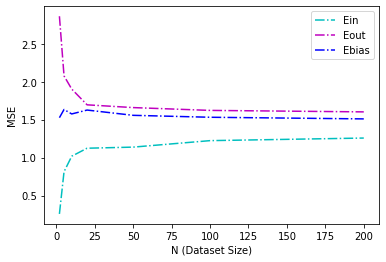

In [127]:
import matplotlib.pyplot as plt


N=[2,5,10,20,50,100,200]


results=[[],[],[]]

for n in N:
    a1,a2,a3 = experiment(n,5,1)
    results[0].append(a1)
    results[1].append(a2)
    results[2].append(a3)

plt.plot(N,results[0],color='c',linestyle='dashdot',label='Ein')
plt.plot(N,results[1],color='m',linestyle='dashdot',label='Eout')
plt.plot(N,results[2],color='b',linestyle='dashdot',label='Ebias')

plt.xlabel('N (Dataset Size)')
plt.ylabel('MSE')
plt.legend()
plt.show()

**plot-SD**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


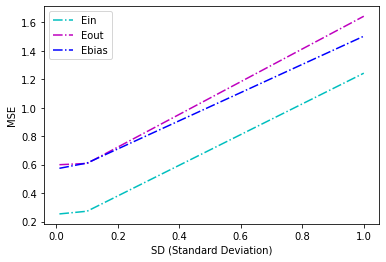

In [128]:
import matplotlib.pyplot as plt


sd=[0.01,0.1,1]


results=[[],[],[]]

for std in sd:
    a1,a2,a3 = experiment(30,5,std)
    results[0].append(a1)
    results[1].append(a2)
    results[2].append(a3)

plt.plot(sd,results[0],color='c',linestyle='dashdot',label='Ein')
plt.plot(sd,results[1],color='m',linestyle='dashdot',label='Eout')
plt.plot(sd,results[2],color='b',linestyle='dashdot',label='Ebias')

plt.xlabel('SD (Standard Deviation)')
plt.ylabel('MSE')
plt.legend()
plt.show()

**plot-d**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


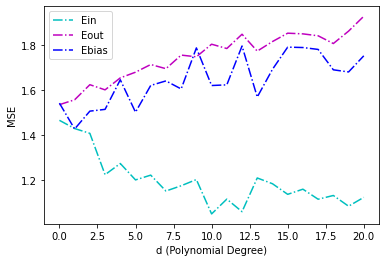

In [129]:
import matplotlib.pyplot as plt


D = [i for i in range(0,21)]


results=[[],[],[]]

for d in D:
    a1,a2,a3 = experiment(30,d,1)
    results[0].append(a1)
    results[1].append(a2)
    results[2].append(a3)

plt.plot(D,results[0],color='c',linestyle='dashdot',label='Ein')
plt.plot(D,results[1],color='m',linestyle='dashdot',label='Eout')
plt.plot(D,results[2],color='b',linestyle='dashdot',label='Ebias')


plt.xlabel('d (Polynomial Degree)')
plt.ylabel('MSE')
plt.legend()
plt.show()

**All results**

In [ ]:
N = [2,5,10,20,50,100,200]
D = [i for i in range(0,21)]
sd=[0.01,0.1,1]

all_results=[[[ [] for x in range(len(N))] for x in range(len(D))]for x in range(len(sd))]

for a in  range(len(N)):
    for b in range(len(D)):
        for c in range(len(sd)):
            Ein_avg,Eout_avg,E_bias = experiment(N[a],D[b],sd[c])
            all_results[a][b][c].append(Ein_avg)
            all_results[a][b][c].append(Eout_avg)
            all_results[a][b][c].append(E_bias)